<a href="https://colab.research.google.com/github/anekoss/AI-System/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [2]:
data = pd.read_csv('/content/Student_Performance.csv')
data.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [3]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data["Extracurricular Activities"].replace({"Yes":1, "No":0}, inplace=True)

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

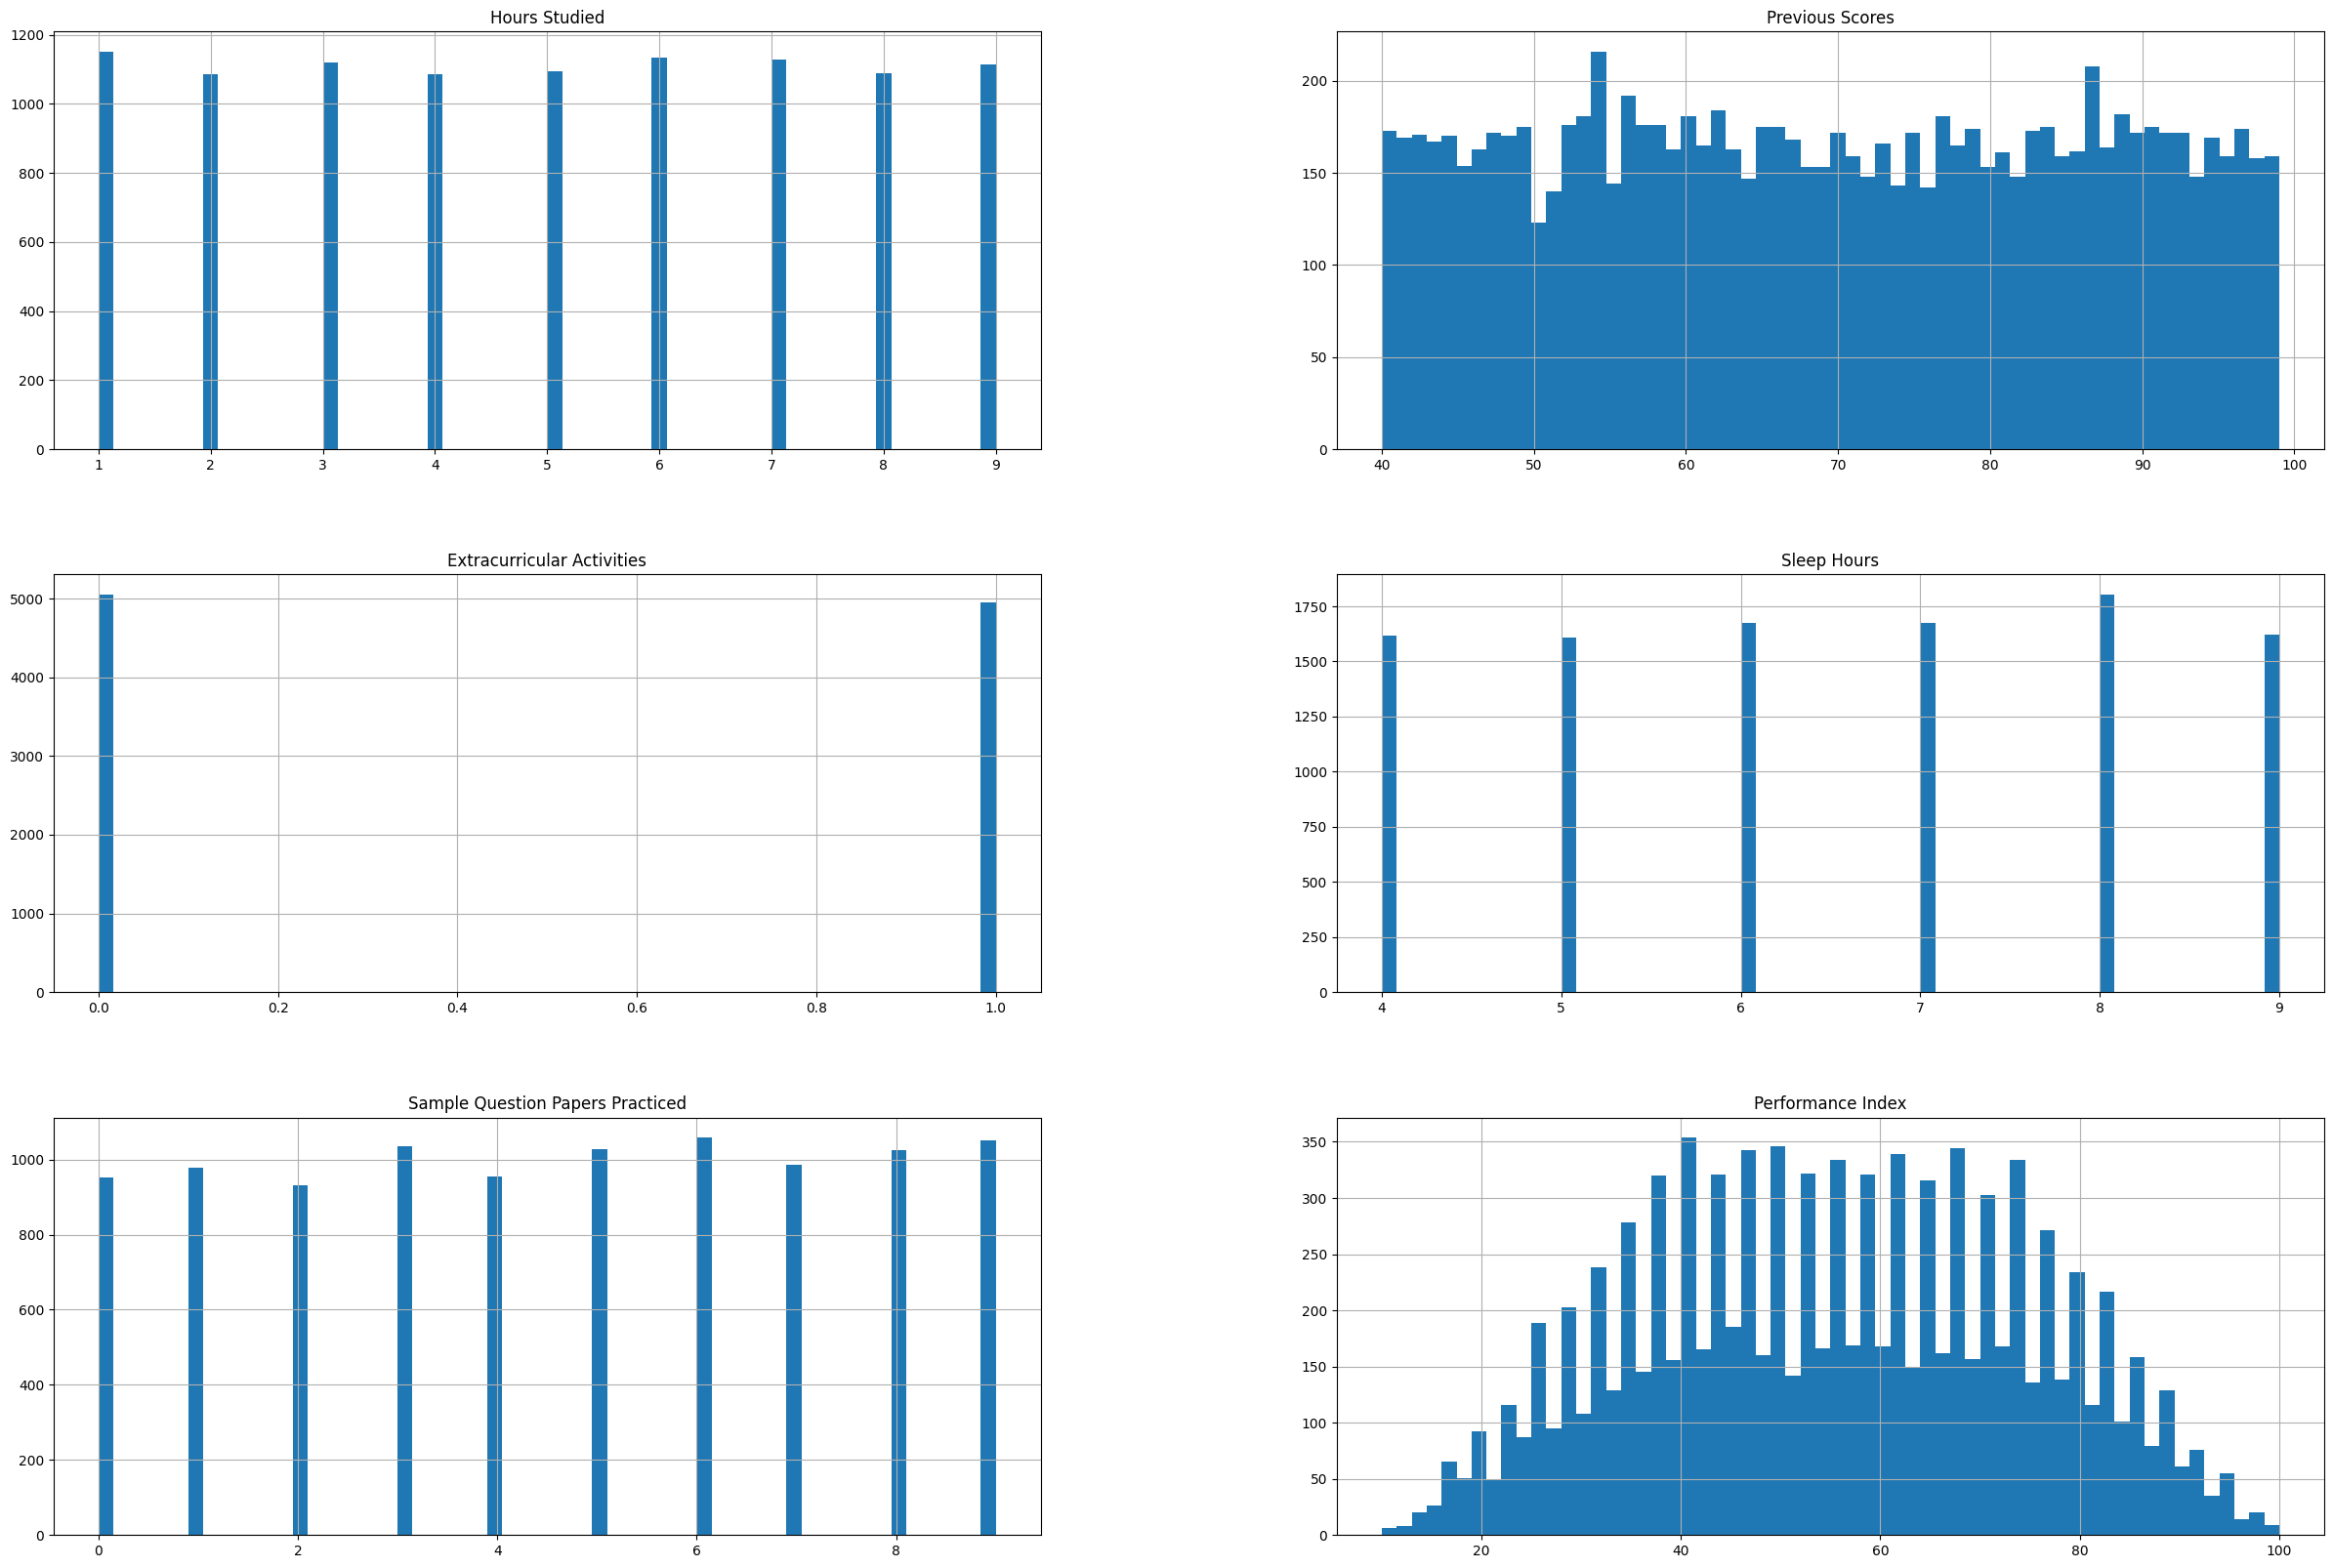

In [7]:
data.hist(bins=60, figsize=(30, 20))


<Axes: >

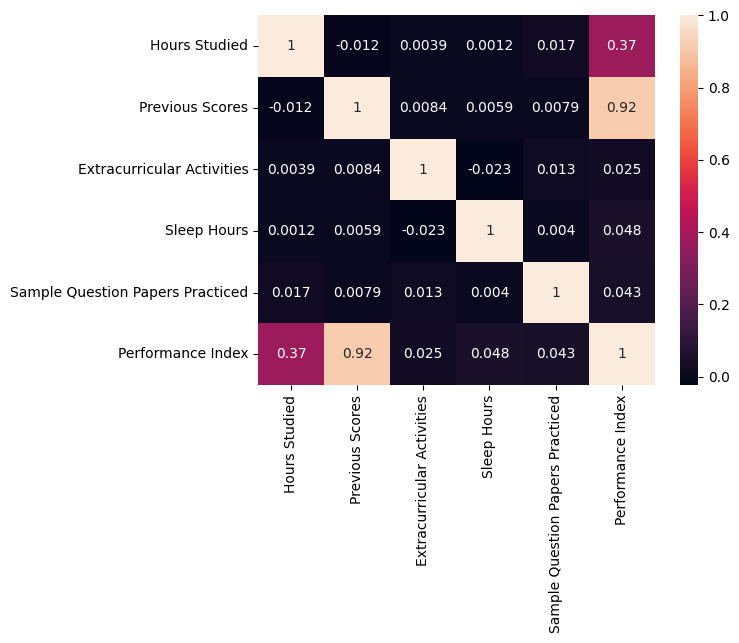

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
for column in data.columns:
  min = data[column].min()
  max=data[column].max()
  data[column]=(data[column] - min) / (max - min)

Разделите данные на обучающий и тестовый наборы данных.

In [10]:
train = 0.8
random_state = 22

train = data.sample(frac=train, random_state=random_state)
test = data.drop(train.index)
train_x = train.drop('Performance Index', axis=1)
train_y = train['Performance Index']
test_x = test.drop('Performance Index', axis=1)
test_y = test['Performance Index']

Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas. Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [11]:
def add_ones(x):
        return np.concatenate((np.ones((len(x), 1)), x), axis=1)

In [12]:
def sum_of_squares(y_test, y_pred):
  return np.sum(np.square(y_test - y_pred))


In [13]:
def r2(y_test, y_pred):
  mean_y = np.mean(y_test)
  total_ss = np.sum(np.square(y_test - mean_y))
  diff = np.sum(np.square(y_test -  y_pred))
  return 1 - diff / total_ss


In [14]:
def train_model(x_train, y_train, columns):
  x = add_ones(x_train[columns])
  y = y_train
  return np.linalg.inv((x.T).dot(x)).dot(x.T).dot(y)

In [15]:
def predict(cf, x, columns):
        return  np.array(add_ones(x[columns]).dot(cf.T))

In [16]:
def leastSquaresMethod(columns, x_train, y_train, x_test, y_test):
  cf = train_model(x_train, y_train, columns)
  y_pred=predict(cf, x_test, columns)
  print('Коэффициент детерминации:', r2(test_y, y_pred))
  print('Сумма квадратов:', sum_of_squares(test_y, y_pred))

Модели по всем признакам и по двум самым детерминированным

In [17]:
leastSquaresMethod(['Hours Studied'], train_x, train_y, test_x, test_y)


Коэффициент детерминации: 0.1408121889070062
Сумма квадратов: 78.5213089800968


In [18]:
leastSquaresMethod(['Previous Scores'], train_x, train_y, test_x, test_y)


Коэффициент детерминации: 0.8329104604249891
Сумма квадратов: 15.27033926100646


In [19]:
cols = list(train_x.columns)
cols.remove('Previous Scores')
leastSquaresMethod(cols, train_x, train_y, test_x, test_y)

Коэффициент детерминации: 0.14433546325989555
Сумма квадратов: 78.19931638370169


In [20]:
cols = list(train_x.columns)
cols.remove("Previous Scores")
cols.remove("Hours Studied")
leastSquaresMethod(cols, train_x, train_y, test_x, test_y)

Коэффициент детерминации: 0.001239246119357218
Сумма квадратов: 91.27690213958144


Две наиболее коррелированные ячейки задают большую часть детерминированности модели линейной регрессии, остальные факторы, вроде количества сна или количества решенных билетов фактически не влияют на результат, поэтому их можно исключить из выборки. Метод линейной регрессии является статическим и обучается сразу на всей выборке, определяя единственную матрицу коэффициентов. Это позволяет быстро находить ответ при обученной модели, но не позволяет ее дообучать.

In [21]:
leastSquaresMethod(["Hours Studied", "Previous Scores"], train_x, train_y, test_x, test_y)

Коэффициент детерминации: 0.985698558108988
Сумма квадратов: 1.3070110202756458
